In [1]:
import tensorflow as tf
import numpy as np
import DATA
import Net
import config as cfg
import cv2
import matplotlib.pyplot as plt
slim = tf.contrib.slim

In [2]:
class test():
    def __init__(self):
        self.data = DATA.CADF()
        self.net = Net.Unet(False)
        self.sess = tf.Session()
        self.variable_to_restore = tf.global_variables()
        self.saver = tf.train.Saver(self.variable_to_restore)
        self.ckpt = tf.train.get_checkpoint_state('./save/')
        if self.ckpt and self.ckpt.model_checkpoint_path:
            self.saver.restore(self.sess, self.ckpt.model_checkpoint_path)
            print("OK")
    
    def test_onepic(self,read_path):
        im = self.data.im_read(read_path)
        xs = np.reshape(im,[1,300,300,3])
        feed_dict = {self.net.images:xs}
        res = self.sess.run([self.net.pre],feed_dict = feed_dict)
        res = res[0]
        res = res[0]
        return res
    
    def save_and_show_res(self,read_path,save_path1,save_path2):
        res = self.test_onepic(read_path)
        image = np.zeros([300,300,3])
        image1 = np.zeros([300,300,3])
        pic = cv2.imread(read_path)
        pic = cv2.resize(pic,(300,300))
        for i in range(300):
            for o in range(300):
                if res[i,o] == 1:
                    image[i,o,0] = 255
                    image1[i,o,2] = 255
                    pic[i,o,2] = 255
                else: 
                    pic[i,o,0] = 255
        plt.imshow(image)
        plt.show()
        cv2.imwrite(save_path1,image1)
        
        cv2.imwrite(save_path2,pic)
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
        plt.imshow(pic)
        plt.show()
        return res
    def show_pre(self,res,label_path):
        label = self.data.label_read(label_path)
        num = 0.0
        for i in range(300):
            for o in range(300):
                if label[i,o] == res[i,o]:
                    num = num+1.0
        #print (num)
        pre = num/(300*300.0)
        print (pre)
        return pre

In [3]:
#tt = test()

Instructions for updating:
Use the `axis` argument instead
INFO:tensorflow:Restoring parameters from ./save/model.ckpt-1303
OK


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


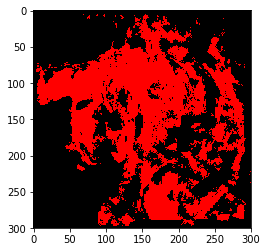

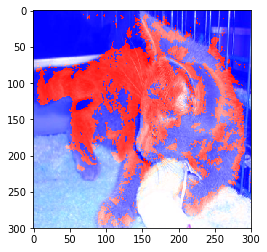

In [4]:
#yy = tt.save_and_show_res('./train/json/100.jpg','./res11.jpg','./res22.jpg')

In [5]:
#pre = tt.show_pre(yy,'./train/label/100.pkl')

65289.0
0.7254333333333334


In [6]:
#print (yy.shape)

(300, 300)
